# Panther Identifier

This notebook has as it's goal to create an artificial intelligence capable of distinguishing Panthers. For that purpose fast.ai will be used, in order to create the neural network, and duck-duck-go, the browser, will be used to search the internet for pictures of the animals in order to feed the model.

For didactical purposes the imported functions and resources will be explained in this document.

In order to begin pip will be updated, as a good practice, and, then, fast.ai and the previously mentioned browser will also be downloaded.

In [2]:
!pip install -U pip
!pip install -Uqq fastai duckduckgo_search

# Step one: getting the data to feed the AI:

Now a function that searches for images of a determined term using duck-duck go will be created. Notice that such function will return a fast.ai List "L", Data structure originated from fast.ai.

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(animal, max_images=30):
    print(f"Searching for '{animal}'")
    return L(ddg_images(animal, max_results=max_images)).itemgot('image')

Notice that in the code above ddg_images, was used. the first parameter used in ddg_images is the keyword for the query. The second parameter is the maximum number of results. In practice the return of search_images is a max_images long fast.ai list of URLs containing images of the animal.

Because searching for "Jaguar" photos might lead the browser to return car photos, the scientific name of the animals will be used. Every living animal that belongs to the family Panthera will be in this article. The function will be called on the next cell.

Searching for 'Panthera onca'


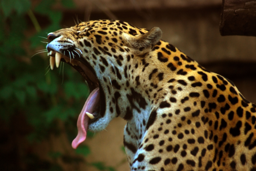

In [4]:
from fastdownload import download_url
Panther1 = 'Panhtera_onca.jpg'
urls = search_images('Panthera onca', max_images=1)
download_url(urls[0], Panther1, show_progress=True)

from fastai.vision.all import *
im1 = Image.open(Panther1)
im1.to_thumb(256,256)

In the cell above the function download_url, from fast.ai is used. What this does is that it downloads the url, passed as the first parameter, and names it the string, second parameter.

the Image.open function turns the JPEG file into a object of the class Image, from fast.ai. The following function to_thumb turns the image into a thumbnail and presents it to the user.

In the cells below the same process will be repeated with the other Panthers:

Searching for 'Panthera pardus'


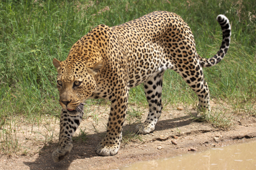

In [5]:
Panther2 = 'Panhtera_pardus.jpg'
urls = search_images('Panthera pardus', max_images=1)
download_url(urls[0], Panther2, show_progress=True)
im2 = Image.open(Panther2)
im2.to_thumb(256,256)

Searching for 'Panthera leo'


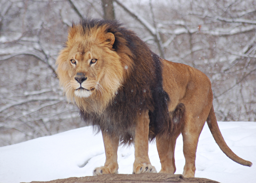

In [6]:
Panther3 = 'Panhtera_leo.jpg'
urls = search_images('Panthera leo', max_images=1)
download_url(urls[0], Panther3, show_progress=True)
im3 = Image.open(Panther3)
im3.to_thumb(256,256)

Searching for 'Panthera tigris'


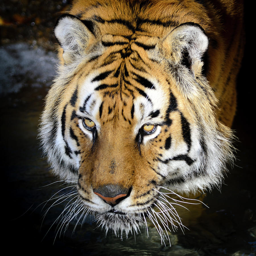

In [7]:
Panther4 = 'Panhtera_tigris.jpg'
urls = search_images('Panthera tigris', max_images=1)
download_url(urls[0], Panther4, show_progress=True)
im4 = Image.open(Panther4)
im4.to_thumb(256,256)

Searching for 'Panthera uncia'


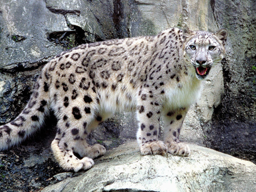

In [8]:
Panther5 = 'Panhtera_uncia.jpg'
urls = search_images('Panthera uncia', max_images=1)
download_url(urls[0], Panther5, show_progress=True)
im5 = Image.open(Panther5)
im5.to_thumb(256,256)

In [9]:
searches = 'Panthera onca','Panthera pardus','Panthera leo','Panthera tigris','Panthera uncia'
path = Path('panther_identifier')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(1)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} bright photo'))
    sleep(1)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(1)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'Panthera onca photo'
Searching for 'Panthera onca bright photo'
Searching for 'Panthera onca shade photo'
Searching for 'Panthera pardus photo'
Searching for 'Panthera pardus bright photo'
Searching for 'Panthera pardus shade photo'
Searching for 'Panthera leo photo'
Searching for 'Panthera leo bright photo'
Searching for 'Panthera leo shade photo'
Searching for 'Panthera tigris photo'
Searching for 'Panthera tigris bright photo'
Searching for 'Panthera tigris shade photo'
Searching for 'Panthera uncia photo'
Searching for 'Panthera uncia bright photo'
Searching for 'Panthera uncia shade photo'


The loop above creates one folder for each Panther containing photos of the respective animal
    
To see the new folders created, as well as the other files created by this notebook, run the command that corresponds to your
Operational System:

In [9]:
!dir

 O volume na unidade C nÆo tem nome.
 O N£mero de S‚rie do Volume ‚ 7EA3-517A

 Pasta de C:\Users\marco\Documents\ML_UnB\T1

02/04/2023  01:46    <DIR>          .
02/04/2023  01:33    <DIR>          ..
01/04/2023  17:05    <DIR>          .ipynb_checkpoints
02/04/2023  01:46         1.806.438 Marcos_Santos_Bittar_200023748_Machine_Learning_Activity_one.ipynb
02/04/2023  01:42         2.478.173 Panhtera_leo.jpg
02/04/2023  01:42         1.111.360 Panhtera_onca.jpg
02/04/2023  01:42        14.931.382 Panhtera_pardus.jpg
02/04/2023  01:42           263.597 Panhtera_tigris.jpg
02/04/2023  01:42           357.445 Panhtera_uncia.jpg
02/04/2023  01:47    <DIR>          panther_identifier
               6 arquivo(s)     20.948.395 bytes
               4 pasta(s)   436.932.481.024 bytes dispon¡veis


In [ ]:
!ls

# Step 2: Training the AI:

Because some images might be downloaded incorrectly, fast.ai has a method that searches the folder for that and deletes 
such images:

In [10]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

4

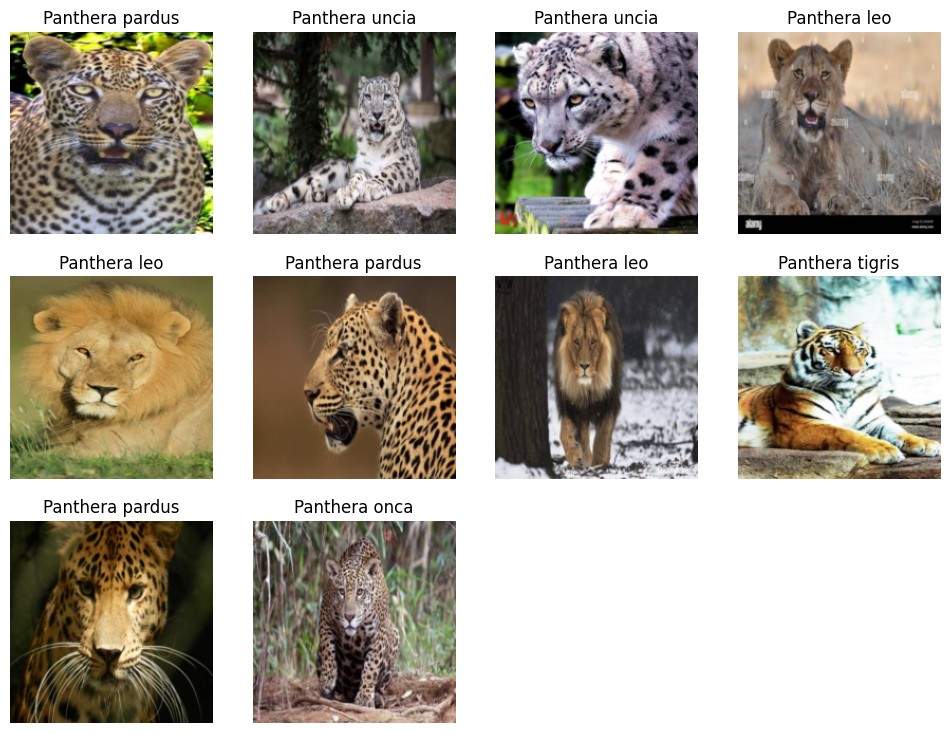

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=10)

The code above comes from fast.ai and creates a data block that will be used to train the AI. All the parameters will be explained below:

ImageBlock: this pertains the input that, in this case, are Images.
Categoryblock: this pertains the output that, in this case, are categories (the scientific names)

get_items=get_image_files: in order to train the AI the path of the input is required, and that is what get_image_files returns.

splitter=RandomSplitter(valid_pct=0.2, seed=42): in order for a AI to be trained a validation set is necessary. this separates a (valid_pct) percentage of the input to work as the validation set. The rest of the Data will be used as trainig set.

get_y=parent_label: in order to know the category of the images when trainig and validating the DATA, parent_label returns the 
name of the folders, i.e. the categories.

item_tfms=[Resize(192, method='squish')]: squishes the images into 192x192 pixels

Now everything necessary to train the Model is set. The code below trains the model using the fine_tuning method, which means we are using a pre-trained AI.

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(7)

C:\Users\marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.785051,0.417816,0.119048,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.267613,0.288350,0.071429,00:16
1,0.178924,0.272542,0.071429,00:15
2,0.119844,0.291835,0.083333,00:15
3,0.088406,0.292205,0.071429,00:15
4,0.070507,0.311493,0.071429,00:15
5,0.055261,0.318198,0.071429,00:15
6,0.043250,0.320141,0.071429,00:15


# Using the AI:

Now let's see in what category will the AI classify the images Downloaded in the beginning of this notebook:

This is a: Panthera onca.
Probability it's a jaguar: 1.0000


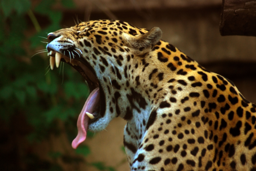

In [13]:
Panther_id,_,probs = learn.predict(PILImage.create('Panhtera_onca.jpg'))
print(f"This is a: {Panther_id}.")
print(f"Probability it's a jaguar: {probs[1]:.4f}")
im1.to_thumb(256,256)

This is a: Panthera pardus.
Probability it's a leopard: 0.9978


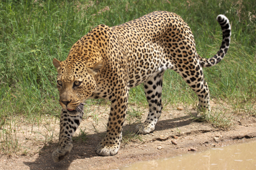

In [14]:
Panther_id,_,probs = learn.predict(PILImage.create('Panhtera_pardus.jpg'))
print(f"This is a: {Panther_id}.")
print(f"Probability it's a leopard: {probs[2]:.4f}")
im2.to_thumb(256,256)

This is a: Panthera leo.
Probability it's a lion: 0.9999


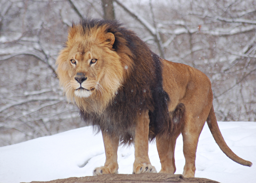

In [15]:
Panther_id,_,probs = learn.predict(PILImage.create('Panhtera_leo.jpg'))
print(f"This is a: {Panther_id}.")
print(f"Probability it's a lion: {probs[0]:.4f}")
im3.to_thumb(256,256)

This is a: Panthera tigris.
Probability it's a tiger: 0.9980


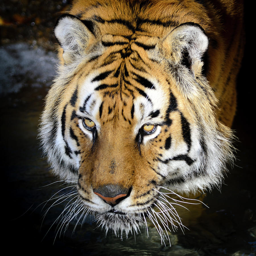

In [16]:
Panther_id,_,probs = learn.predict(PILImage.create('Panhtera_tigris.jpg'))
print(f"This is a: {Panther_id}.")
print(f"Probability it's a tiger: {probs[3]:.4f}")
im4.to_thumb(256,256)

This is a: Panthera uncia.
Probability it's a snow leopard: 1.0000


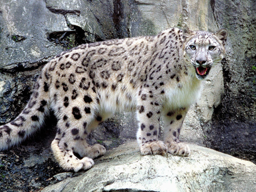

In [17]:
Panther_id,_,probs = learn.predict(PILImage.create('Panhtera_uncia.jpg'))
print(f"This is a: {Panther_id}.")
print(f"Probability it's a snow leopard: {probs[4]:.4f}")
im5.to_thumb(256,256)

just a friendly reminder:
Panthera onca = onça pintada = jaguar
panthera pardus = leopardo = leopard
Panthera leo = leão = lion
Panthera uncia = snow leopard = leopardo das neves
Panthera tigris = tigre = tiger

sources:
    https://github.com/fastai/fastbook   
    https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data
    https://fastai1.fast.ai/vision.image.html#vision.image
    https://pypi.org/project/duckduckgo-search/#3-ddg_images---image-search-by-duckduckgocom
    https://docs.fast.ai/tutorial.vision.html
    https://docs.fast.ai/